# Setup

In [1]:
import ipywidgets as widgets
import networkx as nx
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import random

def generate_graph_with_distance(constraint=3):
    while True:
        # Step 1: Create a random Erdos-Renyi graph
        G = nx.erdos_renyi_graph(9, 0.4)
        
        # Step 2: Add weights to the edges
        for u, v in G.edges():
            G[u][v]['weight'] = random.randint(1, 5)
        
        # Step 3: Check shortest path length between nodes 0 and 7
        if nx.is_connected(G) and nx.has_path(G, 0, 8):
            shortest_path_length = nx.shortest_path_length(G, 0, 8)
            if shortest_path_length >= constraint:
                # Step 3: Get the original positions for the nodes
                pos_original = nx.spring_layout(G)

                # Step 4: Define the mapping of old node names to new node names
                mapping = {i: name for i, name in enumerate(['Here', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'There'])}

                # Step 5: Relabel the nodes
                G_renamed = nx.relabel_nodes(G, mapping)

                # Step 6: Remap the positions to the new node labels
                pos_renamed = {mapping[node]: pos_original[node] for node in G.nodes()}

                return G_renamed, pos_renamed

def show_starting_graph(G_renamed, pos_renamed, traveled_edges = [], frontier_edges = []):
    # Define custom node sizes and colors
    node_sizes = {node: 1250 if node == 'Here' or node == 'There' else 300 for node in G_renamed.nodes()}
    node_colors = {node: 'indianred' if node == 'Here' else 'mediumseagreen' if node == 'There' else 'lightsteelblue' for node in G_renamed.nodes()}
    edge_colors = ['saddlebrown' if edge in traveled_edges else 'moccasin' if edge in frontier_edges else 'black' for edge in G_renamed.edges()]

    # Convert the dictionaries to lists
    sizes = [node_sizes[node] for node in G_renamed.nodes()]
    colors = [node_colors[node] for node in G_renamed.nodes()]

    # Draw the graph with the new labels, customized node sizes, and colors
    plt.figure(figsize=(10, 8))  # Optionally increase the figure size for better visibility
    nx.draw(G_renamed, pos_renamed, with_labels=True, node_size=sizes, node_color=colors, edge_color=edge_colors, width = 2, font_size=12)
    edge_labels = nx.get_edge_attributes(G_renamed, 'weight')
    nx.draw_networkx_edge_labels(G_renamed, pos_renamed, edge_labels=edge_labels)
    plt.show()

def get_frontiers(G, traveled_edges = []):
    # Get the set of nodes involved in the traveled edges
    traveled_nodes = set()
    traveled_nodes.add('Here')
    for u, v in traveled_edges:
        traveled_nodes.add(u)
        traveled_nodes.add(v)

    # Initialize an empty set to store frontier edges
    frontier_edges = set()
    
    # Iterate over all edges in the graph
    for u, v in G.edges():
        if (u in traveled_nodes and v not in traveled_nodes) or (v in traveled_nodes and u not in traveled_nodes):
            frontier_edges.add((u, v))
    return list(frontier_edges)

G, pos = generate_graph_with_distance()
frontier_edges = get_frontiers(G)
traveled_edges = []
output = widgets.Output()
weightd = widgets.Output()

def update_dropdown(change=None):
    global frontier_edges
    if change is not None and change['new'] != 'Placeholder':
        traveled_edges.append(change['new'])
        frontier_edges = get_frontiers(G, traveled_edges)
    edge_options = [('Select an edge', 'Placeholder')] + [(f"({u}---{v})", (u, v)) for u, v in frontier_edges]
    if change is not None and 'There' in change['new']:
        edge_options = []
        frontier_edges = []
    with output:
        output.clear_output(wait=True)  # Clear previous graph output
        show_starting_graph(G, pos, traveled_edges, frontier_edges)
    with weightd:
        weightd.clear_output(wait = True)
        if change is not None and 'There' in change['new']:
            print('Congrats! You made it from here to there!')
        total_weight = sum(G[u][v]['weight'] for u, v in traveled_edges)
        print(f"Total Weight: {total_weight}")
    edge_select.options = edge_options

def on_edge_select(change):
    update_dropdown(change)

edge_select = widgets.Select(
    options=[('Select an edge', 'Placeholder')],  # Initialize with placeholder
    description="Select edge:",
    disabled=False
)

edge_select.observe(on_edge_select, names='value')

def run_game():
    display(weightd)
    display(edge_select)
    display(output)
    update_dropdown(None)

def show_correct():
    # Find the shortest path and its length from 'Here' to 'There'
    shortest_path = nx.shortest_path(G, source='Here', target='There', weight='weight')
    shortest_path_length = nx.shortest_path_length(G, source='Here', target='There', weight='weight')

    # Use shortest_path (list of nodes) to get the edges in that path, including the reverse edges
    shortest_path_edges = [(u, v) for u, v in zip(shortest_path[:-1], shortest_path[1:])]
    shortest_path_edges += [(v, u) for u, v in zip(shortest_path[:-1], shortest_path[1:])]

    print("Shortest path:", shortest_path)
    print("Shortest path length:", shortest_path_length)
    show_starting_graph(G,pos,traveled_edges=shortest_path_edges, frontier_edges=[])

# Start Game 

Choose frontier edges from the dropdown list to try to find the shortest path from Here to There.

In [2]:
run_game()

Output()

Select(description='Select edge:', options=(('Select an edge', 'Placeholder'),), value='Placeholder')

Output()

# Show Correct Shortest Path

Finds the correct shortest path from Here to There using Djiktstra's

Shortest path: ['Here', 'C', 'E', 'There']
Shortest path length: 10


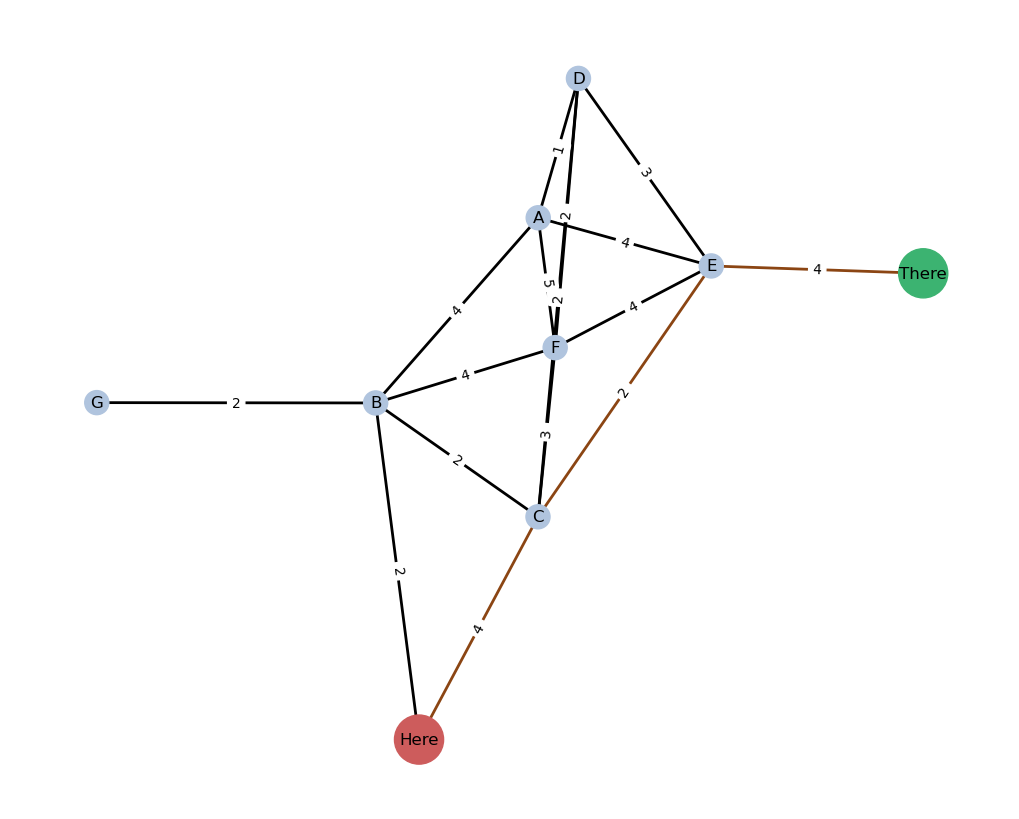

In [3]:
show_correct()